# 자동으로 모델을 학습시켜주는 AutoKeras 설치하기

- [AutoKeras](https://pycaret.org/)은 low-code로 machine learning을 구현할 수 있도록 도와줍니다

- AutoKeras를 사용하기 위해 설치를 먼저 진행해줍니다

In [ ]:
!pip install autokeras

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 148.6/148.6 kB 1.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 128.9/128.9 kB 8.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 415.4/415.4 kB 9.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 950.8/950.8 kB 20.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.2/5.2 MB 35.8 MB/s eta 0:00:00


In [ ]:
import tensorflow as tf
import autokeras as ak

import pandas as pd
import numpy as np
import pandas as pd

from sklearn.model_selection import train_test_split

# 암호화폐 데이터 가져오기


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df = pd.read_csv("/content/drive/MyDrive/coin_data/days/KRW-BTC.csv")
df

,market,datetime,open,high,low,close,trade_price,trade_volume,change_rate
0,KRW-BTC,2017-09-25T09:00:00,4201000.0,4333000.0,4175000.0,4322000.0,5.602146e+08,132.484755,0.028803
1,KRW-BTC,2017-09-26T09:00:00,4317000.0,4418000.0,4311000.0,4321000.0,9.950724e+07,22.788340,-0.000231
2,KRW-BTC,2017-09-27T09:00:00,4322000.0,4677000.0,4318000.0,4657000.0,1.448276e+08,32.269662,0.077760
3,KRW-BTC,2017-09-28T09:00:00,4657000.0,4772000.0,4519000.0,4586000.0,3.721860e+08,80.588243,-0.015246
4,KRW-BTC,2017-09-29T09:00:00,4586000.0,4709000.0,4476000.0,4657000.0,2.724558e+08,59.352373,0.015482
...,...,...,...,...,...,...,...,...,...
2305,KRW-BTC,2024-01-17T09:00:00,59218000.0,59300000.0,58269000.0,58776000.0,1.666847e+11,2837.334490,-0.007095
2306,KRW-BTC,2024-01-18T09:00:00,58776000.0,58900000.0,56754000.0,57284000.0,2.472746e+11,4268.883840,-0.025385
2307,KRW-BTC,2024-01-19T09:00:00,57281000.0,58180000.0,55935000.0,57739000.0,3.199353e+11,5634.881771,0.007943
2308,KRW-BTC,2024-01-20T09:00:00,57738000.0,57796000.0,57242000.0,57517000.0,1.224661e+11,2127.464542,-0.003845


# 인덱스, 문제 데이터, 정답 데이터 나눠주기

In [ ]:
index_df = df.iloc[:, :2]
X_df = df.drop(columns=list(index_df.columns)  + ["close", "change_rate"])
Y_df = df["close"]

# 비트코인 데이터의 단위를 작게 만들어주기
- 값이 너무 크면 모델 학습에 악영향을 끼칠 수 있으니 log를 씌워줍니다

In [ ]:
X_df.iloc[:, :-1] = np.log1p(X_df.iloc[:, :-1])
Y_df = np.log1p(Y_df)

# X_df, Y_df를 학습용, 시험용으로 분할하기

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(
    X_df, Y_df, test_size=0.10, shuffle=False)

# AutoKeras 기반의 예측 모델 선언

In [ ]:
reg = ak.StructuredDataRegressor(
    overwrite=True, max_trials=3
)

# 모델 학습시키기

In [ ]:
reg.fit(
    X_train,
    y_train,
    validation_split=0.05,
    epochs=30,
)

Trial 3 Complete [00h 00m 15s]
val_loss: 0.041470520198345184

Best val_loss So Far: 0.041470520198345184
Total elapsed time: 00h 01m 10s
Epoch 1/30
65/65 [==============================] - 1s 3ms/step - loss: 62.9395 - mean_squared_error: 62.9395
Epoch 2/30
65/65 [==============================] - 0s 3ms/step - loss: 46.0792 - mean_squared_error: 46.0792
Epoch 3/30
65/65 [==============================] - 0s 3ms/step - loss: 5.9486 - mean_squared_error: 5.9486
Epoch 4/30
65/65 [==============================] - 0s 3ms/step - loss: 3.5842 - mean_squared_error: 3.5842
Epoch 5/30
65/65 [==============================] - 0s 3ms/step - loss: 2.2049 - mean_squared_error: 2.2049
Epoch 6/30
65/65 [==============================] - 0s 3ms/step - loss: 1.3169 - mean_squared_error: 1.3169
Epoch 7/30
65/65 [==============================] - 0s 3ms/step - loss: 0.8957 - mean_squared_error: 0.8957
Epoch 8/30
65/65 [==============================] - 0s 3ms/step - loss: 0.6917 - mean_squared_error: 0

# 학습 시 사용하지 않은 데이터로 가격 예측

In [ ]:
y_pred = reg.predict(X_test)

8/8 [==============================] - 0s 5ms/step


In [ ]:
result_df = np.exp(pd.DataFrame([y_pred.flatten(), y_test]).T)
result_df.columns = ["y_pred", "y_test"]
result_df["y_pred"] = round(result_df["y_pred"], 0)

# 예측값과 실제값 시각화로 비교해보기

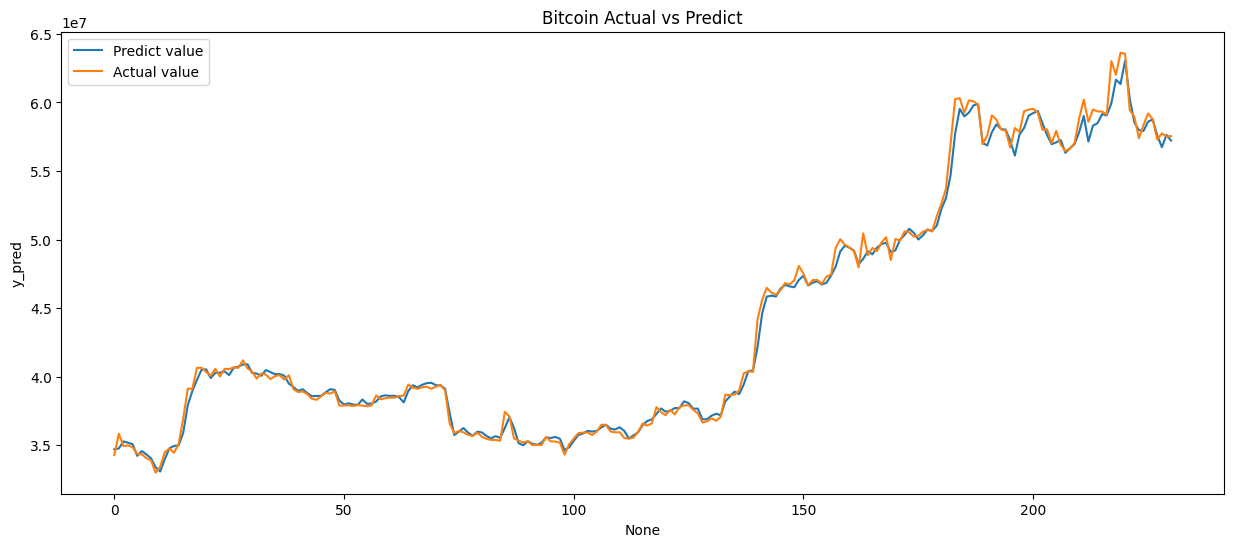

In [ ]:
plt.figure(figsize=(15,6))
sns.lineplot(
    result_df,
    x=result_df.index,
    y=result_df["y_pred"],
    label="Predict value"
)
sns.lineplot(
    result_df,
    x=result_df.index,
    y=result_df["y_test"],
    label="Actual value"
)
plt.title("Bitcoin Actual vs Predict")
plt.show()